📊 Data shape: (1186, 8)
📋 Columns: ['review', 'rating', 'date', 'bank', 'source', 'sentiment_label', 'sentiment_score', 'identified_themes']

📈 Sample data:
                             review  rating        date bank       source  \
0            Make it user friendly.       2  2025-11-29  CBE  Google Play   
1  maaliif daddafee install gaafata       3  2025-11-28  CBE  Google Play   
2                          good app       5  2025-11-28  CBE  Google Play   

  sentiment_label  sentiment_score identified_themes  
0        positive         0.992062             Other  
1        negative        -0.987553             Other  
2        positive         0.999849             Other  

🏦 Banks in dataset: ['CBE', 'BOA', 'Dashen']

🔍 RUNNING SENTIMENT ANALYSIS


Device set to use cpu



🧪 Testing sentiment analysis on 3 sample reviews...
Sample result type: <class 'pandas.core.frame.DataFrame'>
Sample result columns: ['sentiment_label', 'sentiment_score']
Sample result shape: (3, 2)
Sample result:
  sentiment_label  sentiment_score
0        positive         0.992062
1        negative        -0.987553
2        positive         0.999849

🚀 Running sentiment analysis on all reviews...

✅ Sentiment analysis completed!
Result type: <class 'pandas.core.frame.DataFrame'>
DataFrame shape: (1186, 2)
DataFrame columns: ['sentiment_label', 'sentiment_score']
✓ Found 'sentiment_score' column

📋 Final check:
DataFrame shape after sentiment: (1186, 8)
Columns: ['review', 'rating', 'date', 'bank', 'source', 'sentiment_label', 'sentiment_score', 'identified_themes']

Sentiment column info:
Type: <class 'pandas.core.series.Series'>
Non-null count: 1186
Unique values: 1031

First 5 sentiment values:
  0: <class 'float'> - 0.9920620918273926
  1: <class 'float'> - -0.9875526428222656
 

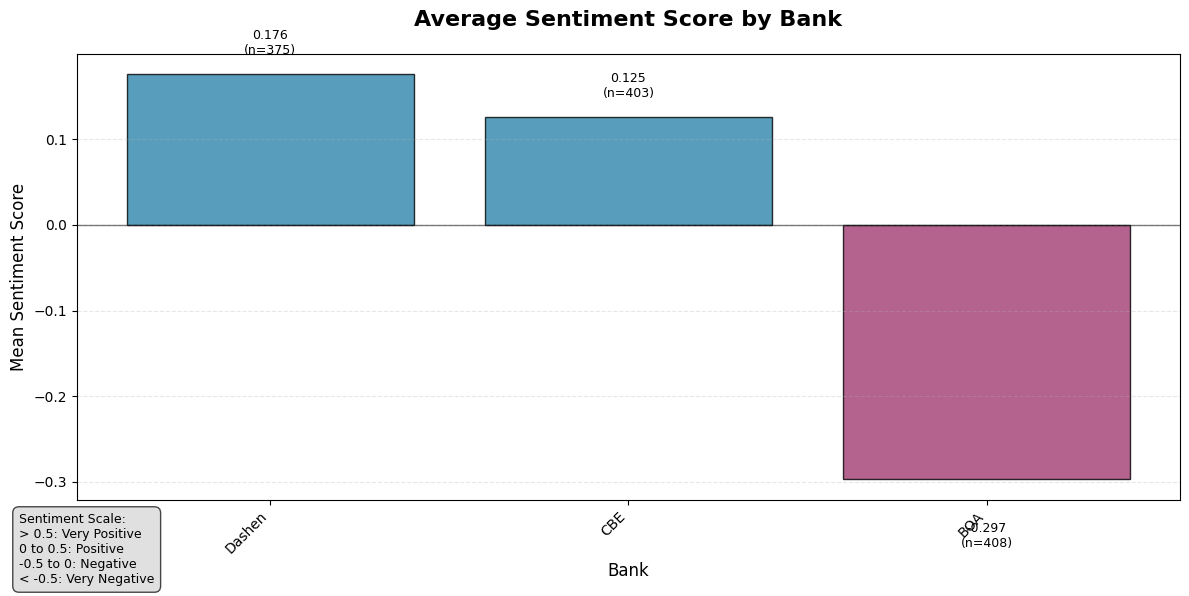


⭐ Generating rating distribution...


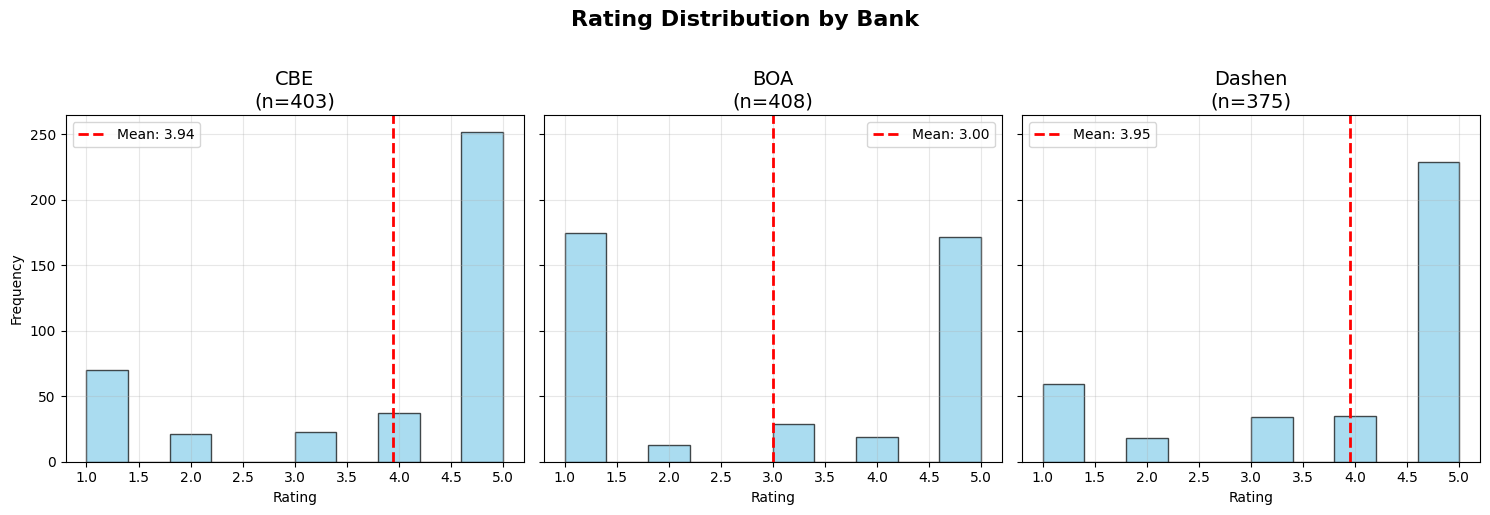


☁️  Generating word clouds...


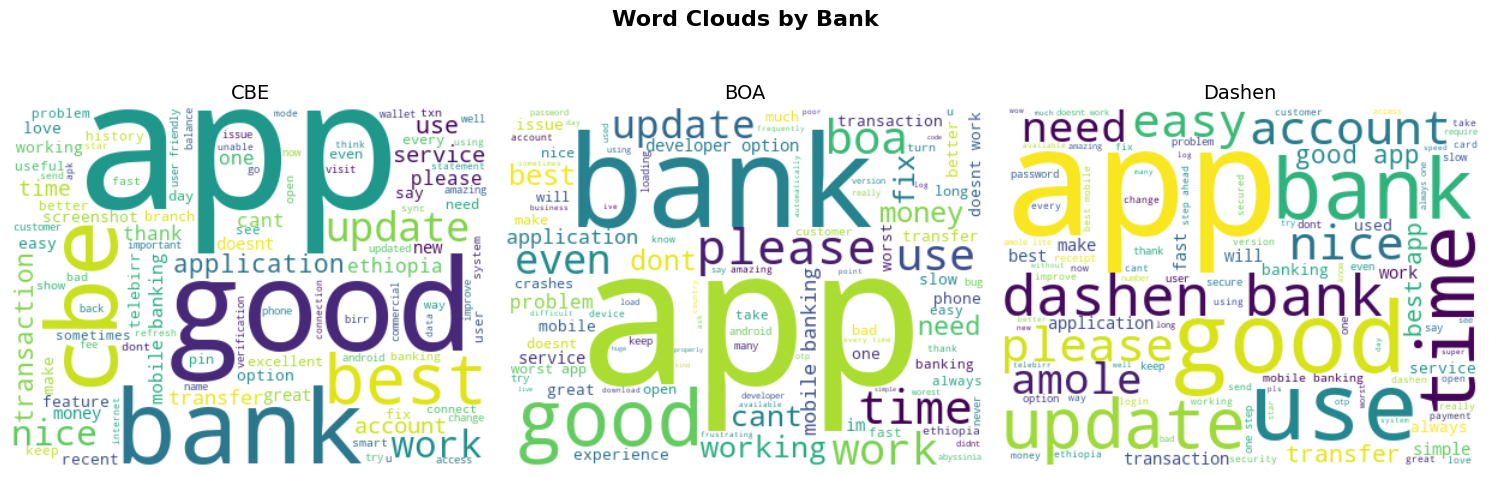


📊 Generating sentiment vs rating correlation...
⚠️ This method requires both sentiment and rating to be numeric
   Ensure sentiment_score and rating columns contain numeric values

💡 GENERATING INSIGHTS & RECOMMENDATIONS

📊 Sentiment Overview:
Total reviews analyzed: 1186
Average sentiment: -0.004
Positive reviews (>0): 581
Neutral reviews (=0): 0
Negative reviews (<0): 605

----------------------------------------
🏆 DRIVERS & PAIN POINTS PER BANK
----------------------------------------

🏦 CBE:
  ✅ Key Drivers (from detailed positive reviews):
    1. "Truly, super competitive when compared to a well known app nowadays functioning broadly by simplest ..."
    2. "I use the Commercial Bank of Ethiopia mobile app, and it’s fantastic! The interface is user-friendly..."
    3. "Amazing, Delightful and Seamless Mobile Banking Application, I have ever Experienced!! Indeed, I fee..."
  ❌ Key Pain Points (from detailed negative reviews):
    1. "Suddenly the cbe application I was using stoppe

In [2]:
# Ensure src is importable
import sys
sys.path.append("../src")

# Imports
import pandas as pd
import numpy as np
from sentiment import SentimentAnalyzer
from themes import ThemeExtractor
from visualizer import Visualizer  
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# Step 1: Load Data
# ----------------------------
df = pd.read_csv("task2_results.csv")
print(f"📊 Data shape: {df.shape}")
print(f"📋 Columns: {df.columns.tolist()}")
print(f"\n📈 Sample data:")
print(df.head(3))
print(f"\n🏦 Banks in dataset: {df['bank'].unique().tolist()}")

# ----------------------------
# Step 2: Sentiment Analysis (UPDATED)
# ----------------------------
print("\n" + "="*60)
print("🔍 RUNNING SENTIMENT ANALYSIS")
print("="*60)

# Initialize sentiment analyzer
sentiment_analyzer = SentimentAnalyzer(method="auto")

# First, let's test on a small sample to understand the output
print("\n🧪 Testing sentiment analysis on 3 sample reviews...")
sample_reviews = df["review"].head(3)
sample_result = sentiment_analyzer.analyze_series(sample_reviews)

print(f"Sample result type: {type(sample_result)}")
if isinstance(sample_result, pd.DataFrame):
    print(f"Sample result columns: {sample_result.columns.tolist()}")
    print(f"Sample result shape: {sample_result.shape}")
    print("Sample result:")
    print(sample_result)
elif isinstance(sample_result, pd.Series):
    print(f"Sample result length: {len(sample_result)}")
    print("Sample result:")
    print(sample_result)
else:
    print(f"Sample result: {sample_result}")

# Now run on all reviews
print("\n🚀 Running sentiment analysis on all reviews...")
sentiment_result = sentiment_analyzer.analyze_series(df["review"])

print(f"\n✅ Sentiment analysis completed!")
print(f"Result type: {type(sentiment_result)}")

# Handle the sentiment result properly
if isinstance(sentiment_result, pd.DataFrame):
    print(f"DataFrame shape: {sentiment_result.shape}")
    print(f"DataFrame columns: {sentiment_result.columns.tolist()}")
    
    # Check if we have a sentiment_score column
    if 'sentiment_score' in sentiment_result.columns:
        print("✓ Found 'sentiment_score' column")
        df['sentiment_score'] = sentiment_result['sentiment_score']
    elif len(sentiment_result.columns) == 1:
        print("✓ Using single column from DataFrame")
        df['sentiment_score'] = sentiment_result.iloc[:, 0]
    else:
        print("⚠ Multiple columns found, concatenating all")
        df = pd.concat([df, sentiment_result], axis=1)
        
elif isinstance(sentiment_result, pd.Series):
    print(f"Series length: {len(sentiment_result)}")
    df['sentiment_score'] = sentiment_result.values
    
elif isinstance(sentiment_result, list):
    print(f"List length: {len(sentiment_result)}")
    df['sentiment_score'] = sentiment_result
    
elif isinstance(sentiment_result, np.ndarray):
    print(f"Array shape: {sentiment_result.shape}")
    df['sentiment_score'] = sentiment_result.tolist()
    
else:
    print(f"⚠ Unexpected type: {type(sentiment_result)}")
    # Try to convert
    try:
        sentiment_list = list(sentiment_result)
        print(f"Converted to list of length: {len(sentiment_list)}")
        df['sentiment_score'] = sentiment_list
    except:
        print("❌ Could not convert to list")
        # Create placeholder scores
        df['sentiment_score'] = 0.0

print(f"\n📋 Final check:")
print(f"DataFrame shape after sentiment: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nSentiment column info:")
print(f"Type: {type(df['sentiment_score'])}")
print(f"Non-null count: {df['sentiment_score'].notna().sum()}")
print(f"Unique values: {df['sentiment_score'].nunique()}")
print(f"\nFirst 5 sentiment values:")
for i, val in enumerate(df['sentiment_score'].head()):
    print(f"  {i}: {type(val)} - {val}")

# ----------------------------
# Step 3: Theme Extraction
# ----------------------------
print("\n" + "="*60)
print("🎯 RUNNING THEME EXTRACTION")
print("="*60)

theme_extractor = ThemeExtractor(top_k_keywords=10)

# Extract top keywords per bank
print("\n🔑 Extracting top keywords per bank...")
bank_keywords = theme_extractor.extract_bank_keywords(df, bank_col="bank", text_col="review")

print("\n📊 Top keywords per bank:")
for bank, kws in bank_keywords.items():
    print(f"\n🏦 {bank}:")
    for i, (keyword, score) in enumerate(kws[:5], 1):  # Show top 5
        print(f"  {i}. {keyword} (score: {score:.3f})")

# Optional: Map keywords to rules-based themes
print("\n" + "-"*40)
print("🎨 Mapping keywords to themes...")
theme_mapping = {
    "Transaction Performance": ["slow", "transfer", "loading", "payment", "transaction", "fast", "quick", "delay"],
    "Account Access Issues": ["login", "password", "access", "authenticate", "biometric", "locked", "security"],
    "User Interface": ["UI", "interface", "design", "navigation", "experience", "layout", "menu", "screen"],
    "Customer Support": ["support", "help", "service", "response", "chatbot", "assistance", "contact", "agent"],
    "App Performance": ["crash", "bug", "glitch", "freeze", "lag", "responsive", "smooth", "stable"],
    "Features & Functionality": ["feature", "function", "tool", "option", "setting", "customize", "personalize"]
}

bank_themes = {}
for bank, kws in bank_keywords.items():
    kw_list = [k[0] for k in kws]
    themes = theme_extractor.rule_based_theme_mapping(kw_list, theme_mapping)
    bank_themes[bank] = themes

print("\n🎯 Suggested themes per bank:")
for bank, themes in bank_themes.items():
    if themes:
        print(f"\n🏦 {bank}:")
        for theme in themes:
            print(f"  • {theme}")
    else:
        print(f"\n🏦 {bank}: No strong themes identified")

# ----------------------------
# Step 4: Visualizations
# ----------------------------
print("\n" + "="*60)
print("📊 GENERATING VISUALIZATIONS")
print("="*60)

# Check if we have sentiment data
if 'sentiment_score' in df.columns and df['sentiment_score'].notna().sum() > 0:
    print("✓ Sentiment data available for visualization")
    
    # Create visualizer
    viz = Visualizer(df)
    
    # 1. Plot average sentiment
    print("\n📈 Generating sentiment bar chart...")
    sentiment_summary = viz.plot_avg_sentiment()
    
    # 2. Plot rating distribution if rating column exists
    if 'rating' in df.columns:
        print("\n⭐ Generating rating distribution...")
        viz.plot_rating_distribution()
    else:
        print("\n⚠ Rating column not found, skipping rating distribution")
    
    # 3. Generate word clouds
    print("\n☁️  Generating word clouds...")
    viz.generate_wordclouds()
    
    # 4. Plot sentiment vs rating correlation (if both exist)
    if 'rating' in df.columns and 'sentiment_score' in df.columns:
        print("\n📊 Generating sentiment vs rating correlation...")
        viz.plot_sentiment_vs_rating()
    
else:
    print("❌ No sentiment data available for visualization")

# ----------------------------
# Step 5: Insights & Recommendations
# ----------------------------
print("\n" + "="*60)
print("💡 GENERATING INSIGHTS & RECOMMENDATIONS")
print("="*60)

# Check sentiment scores exist
if 'sentiment_score' in df.columns:
    # Convert sentiment to numeric if needed
    try:
        df['sentiment_numeric'] = pd.to_numeric(df['sentiment_score'], errors='coerce')
    except:
        # Try manual conversion
        def convert_sentiment(x):
            try:
                if isinstance(x, (list, tuple, np.ndarray)) and len(x) > 0:
                    return float(x[0])
                elif pd.api.types.is_number(x):
                    return float(x)
                elif isinstance(x, str):
                    try:
                        return float(x)
                    except:
                        return 0.0
                else:
                    return 0.0
            except:
                return 0.0
        
        df['sentiment_numeric'] = df['sentiment_score'].apply(convert_sentiment)
    
    print("\n📊 Sentiment Overview:")
    print(f"Total reviews analyzed: {len(df)}")
    print(f"Average sentiment: {df['sentiment_numeric'].mean():.3f}")
    print(f"Positive reviews (>0): {(df['sentiment_numeric'] > 0).sum()}")
    print(f"Neutral reviews (=0): {(df['sentiment_numeric'] == 0).sum()}")
    print(f"Negative reviews (<0): {(df['sentiment_numeric'] < 0).sum()}")
    
    # Drivers and pain points per bank
    print("\n" + "-"*40)
    print("🏆 DRIVERS & PAIN POINTS PER BANK")
    print("-"*40)
    
    drivers = {}
    pain_points = {}
    
    for bank in df['bank'].unique():
        bank_df = df[df['bank'] == bank].copy()
        
        if 'sentiment_numeric' in bank_df.columns:
            # Positive sentiment drivers (longer reviews with positive sentiment)
            pos_reviews = bank_df[bank_df['sentiment_numeric'] > 0]
            if len(pos_reviews) > 0:
                # Get longest positive reviews (likely more detailed)
                pos_reviews['review_length'] = pos_reviews['review'].str.len()
                drivers[bank] = pos_reviews.nlargest(3, 'review_length')['review'].tolist()
            
            # Negative sentiment pain points
            neg_reviews = bank_df[bank_df['sentiment_numeric'] < 0]
            if len(neg_reviews) > 0:
                neg_reviews['review_length'] = neg_reviews['review'].str.len()
                pain_points[bank] = neg_reviews.nlargest(3, 'review_length')['review'].tolist()
    
    # Print insights
    for bank in df['bank'].unique():
        print(f"\n🏦 {bank}:")
        
        if bank in drivers and drivers[bank]:
            print("  ✅ Key Drivers (from detailed positive reviews):")
            for i, review in enumerate(drivers[bank][:3], 1):
                snippet = review[:100] + "..." if len(review) > 100 else review
                print(f"    {i}. \"{snippet}\"")
        
        if bank in pain_points and pain_points[bank]:
            print("  ❌ Key Pain Points (from detailed negative reviews):")
            for i, review in enumerate(pain_points[bank][:3], 1):
                snippet = review[:100] + "..." if len(review) > 100 else review
                print(f"    {i}. \"{snippet}\"")
    
    # ----------------------------
    # Actionable Recommendations
    # ----------------------------
    print("\n" + "="*60)
    print("🚀 ACTIONABLE RECOMMENDATIONS")
    print("="*60)
    
    for bank in df['bank'].unique():
        bank_df = df[df['bank'] == bank]
        avg_sentiment = bank_df['sentiment_numeric'].mean()
        
        print(f"\n🏦 RECOMMENDATIONS FOR {bank}:")
        print(f"  Current average sentiment: {avg_sentiment:.3f}")
        
        # Get themes for this bank
        bank_theme_list = bank_themes.get(bank, [])
        
        if avg_sentiment > 0.3:
            print("  📈 Status: Performing well")
            print("  💡 Recommendations:")
            print("    1. Continue current successful strategies")
            print("    2. Promote positive aspects in marketing")
            if bank_theme_list:
                print(f"    3. Leverage strengths in: {', '.join(bank_theme_list)}")
                
        elif avg_sentiment > 0:
            print("  ⚠️  Status: Room for improvement")
            print("  💡 Recommendations:")
            print("    1. Address minor pain points")
            print("    2. Enhance user experience")
            if bank_theme_list:
                print(f"    3. Focus improvements on: {', '.join(bank_theme_list)}")
                
        elif avg_sentiment > -0.3:
            print("  🔴 Status: Needs attention")
            print("  💡 Recommendations:")
            print("    1. Conduct detailed user feedback sessions")
            print("    2. Prioritize bug fixes and performance issues")
            if bank_theme_list:
                print(f"    3. Critical areas: {', '.join(bank_theme_list)}")
                
        else:
            print("  🚨 Status: Critical - immediate action required")
            print("  💡 Recommendations:")
            print("    1. Form a dedicated task force")
            print("    2. Implement emergency fixes")
            print("    3. Communicate with users about improvements")
            if bank_theme_list:
                print(f"    4. Urgent fixes needed for: {', '.join(bank_theme_list)}")
        
        # Specific recommendations based on themes
        if bank_theme_list:
            print("\n  🔍 Theme-based suggestions:")
            for theme in bank_theme_list:
                if "Transaction" in theme:
                    print(f"    • Optimize transaction processing speed")
                elif "Access" in theme:
                    print(f"    • Simplify login and authentication process")
                elif "Interface" in theme:
                    print(f"    • Conduct UI/UX usability testing")
                elif "Support" in theme:
                    print(f"    • Improve customer support response times")
                elif "Performance" in theme:
                    print(f"    • Fix app crashes and stability issues")
                elif "Feature" in theme:
                    print(f"    • Add frequently requested features")
        
        print(f"\n  📝 Review count: {len(bank_df)}")
        print(f"  📊 Sentiment range: {bank_df['sentiment_numeric'].min():.2f} to {bank_df['sentiment_numeric'].max():.2f}")
    
else:
    print("❌ No sentiment data available for insights")

print("\n" + "="*60)
print("✅ ANALYSIS COMPLETE")
print("="*60)
print("\n📁 Next steps:")
print("  1. Review the visualizations for insights")
print("  2. Check the theme analysis for common patterns")
print("  3. Implement recommendations based on findings")
print("  4. Consider A/B testing for proposed changes")